bwのheaderに染色体のサイズがいる。

https://github.com/igvteam/igv/tree/master/genomes/sizes

からダウンロードが必要。

https://minhaskamal.github.io/DownGit/#/home

を使うと便利。

In [88]:
import pandas as pd
import numpy as np
import scipy.stats as stats  
import matplotlib.pyplot as plt

import pyBigWig

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [89]:
f_chrom_size = 'mm10.chrom.sizes'

len_step = 500
len_span = len_step

f_pvalue = 'select_chr1.X_mPBAT_1000Window/CD4SP/CD4SP_chr1.X_betaDiffCal_from_posiNegaFiles_1000.500step.txt'
f_bw_NP = 'select_chr1.X_mPBAT_1000Window/CD4SP/CD4SP_chr1.X_betaDiffCal_from_posiNegaFiles_1000.500step.NP.bw'
f_bw_PN = 'select_chr1.X_mPBAT_1000Window/CD4SP/CD4SP_chr1.X_betaDiffCal_from_posiNegaFiles_1000.500step.PN.bw'

In [90]:
!wget https://minhaskamal.github.io/DownGit/#/home?url=https://github.com/igvteam/igv/blob/master/genomes/sizes/mm10.chrom.sizes

--2019-02-18 13:37:37--  https://minhaskamal.github.io/DownGit/
minhaskamal.github.io (minhaskamal.github.io) をDNSに問いあわせています... 185.199.108.153, 185.199.111.153, 185.199.110.153, ...
minhaskamal.github.io (minhaskamal.github.io)|185.199.108.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 2026 (2.0K) [text/html]
`index.html' に保存中

index.html          100%[===================>]   1.98K  --.-KB/s    時間 0s    

2019-02-18 13:37:37 (171 MB/s) - `index.html' へ保存完了 [2026/2026]



In [91]:
df_f_pvalue = pd.read_table(f_pvalue)
df_f_pvalue.head()

,chr,start,end,P_me,P_de,P_low,P_ratio,P_high,N_me,N_de,N_low,N_ratio,N_high,Pvalue_PN,Pvalue_NP,flag
0,chr1,1,1000,0,0,0.05,0.5,0.95,0,0,0.05,0.5,0.95,0.5,0.5,0
1,chr1,501,1500,0,0,0.05,0.5,0.95,0,0,0.05,0.5,0.95,0.5,0.5,0
2,chr1,1001,2000,0,0,0.05,0.5,0.95,0,0,0.05,0.5,0.95,0.5,0.5,0
3,chr1,1501,2500,0,0,0.05,0.5,0.95,0,0,0.05,0.5,0.95,0.5,0.5,0
4,chr1,2001,3000,0,0,0.05,0.5,0.95,0,0,0.05,0.5,0.95,0.5,0.5,0


In [93]:
df_f_pvalue[df_f_pvalue['Pvalue_PN'] == 0]

,chr,start,end,P_me,P_de,P_low,P_ratio,P_high,N_me,N_de,N_low,N_ratio,N_high,Pvalue_PN,Pvalue_NP,flag
7345,chr1,3672501,3673500,109,815,0.102,0.119,0.137,269,179,0.562,0.600,0.638,0.0,1.0,1
9496,chr1,4748001,4749000,0,356,0.000,0.002,0.008,786,99,0.869,0.888,0.904,0.0,1.0,1
9572,chr1,4786001,4787000,205,511,0.260,0.287,0.315,474,24,0.933,0.951,0.965,0.0,1.0,1
12428,chr1,6214001,6215000,107,12593,0.007,0.008,0.010,15,10896,0.001,0.001,0.002,0.0,1.0,1
26853,chr1,13426501,13427500,179,429,0.265,0.295,0.326,278,249,0.492,0.527,0.563,0.0,1.0,1
27028,chr1,13514001,13515000,190,512,0.244,0.271,0.299,1266,76,0.932,0.943,0.953,0.0,1.0,1
31318,chr1,15659001,15660000,159,128,0.505,0.554,0.601,1440,165,0.884,0.897,0.909,0.0,1.0,1
32338,chr1,16169001,16170000,1047,221,0.807,0.825,0.842,774,34,0.944,0.957,0.968,0.0,1.0,1
33517,chr1,16758501,16759500,364,284,0.529,0.562,0.593,861,42,0.940,0.953,0.964,0.0,1.0,1
35905,chr1,17952501,17953500,441,156,0.708,0.738,0.767,1797,77,0.951,0.959,0.966,0.0,1.0,1


In [4]:
df_f_pvalue['bw_center'] = ((df_f_pvalue['end'] + df_f_pvalue['start'] - 1) / 2).astype(int)
df_f_pvalue['bw_start'] = (df_f_pvalue['bw_center'] - len_step/2).astype(int)
df_f_pvalue['bw_end'] = (df_f_pvalue['bw_center'] + len_step/2).astype(int)

In [5]:
df_f_pvalue['-log10_Pvalue_PN'] = -np.log10(df_f_pvalue['Pvalue_PN'])
df_f_pvalue['-log10_Pvalue_NP'] = -np.log10(df_f_pvalue['Pvalue_NP'])

/home/yyasumizu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/home/yyasumizu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/home/yyasumizu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


In [6]:
df_f_pvalue[['chr', 'bw_start', 'bw_end', '-log10_Pvalue_PN']].head()

,chr,bw_start,bw_end,-log10_Pvalue_PN
0,chr1,250,750,0.30103
1,chr1,750,1250,0.30103
2,chr1,1250,1750,0.30103
3,chr1,1750,2250,0.30103
4,chr1,2250,2750,0.30103


In [15]:
df_chrom_size = pd.read_table(f_chrom_size, header=None)
df_chrom_size.columns = ['chr', 'size']
df_chrom_size

,chr,size
0,chr1,195471971
1,chr2,182113224
2,chr3,160039680
3,chr4,156508116
4,chr5,151834684
5,chr6,149736546
6,chr7,145441459
7,chr8,129401213
8,chr9,124595110
9,chr10,130694993


In [71]:
d = df_f_pvalue[df_f_pvalue['-log10_Pvalue_NP'] == df_f_pvalue['-log10_Pvalue_NP'].max()]

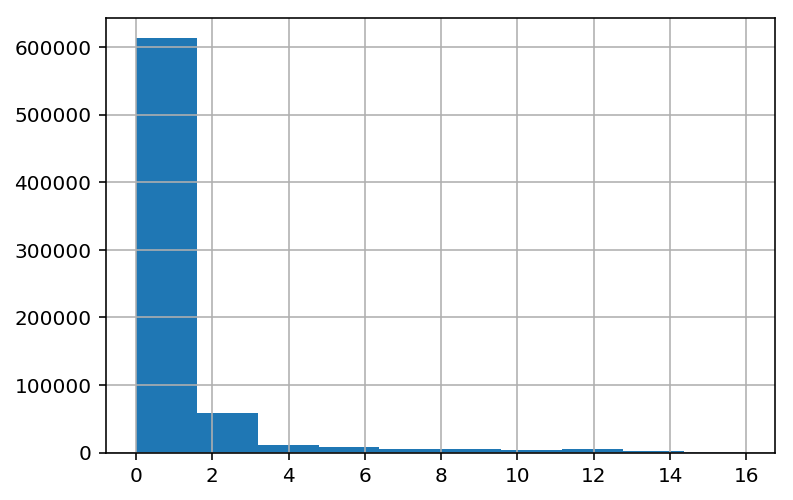

In [81]:
df_f_pvalue[df_f_pvalue['-log10_Pvalue_NP'] < 1000000]['-log10_Pvalue_NP'].hist()

In [22]:
list_chrom_size = []
for pos,row in df_chrom_size.iterrows():
    list_chrom_size.append((row['chr'], row['size']))

In [87]:
bw = pyBigWig.open(f_bw_NP, "w")
bw.addHeader(list_chrom_size)

for c in [x[0] for x in list_chrom_size]:
    d_q = df_f_pvalue.query('chr==@c')
    if d_q.shape[0] > 0:
        bw.addEntries(c, list(d_q.start-1)[0]-int(len_span/2), values=list(d_q['-log10_Pvalue_NP']), span=len_span, step=len_step)

bw.close()

bw = pyBigWig.open(f_bw_PN, "w")
bw.addHeader(list_chrom_size)

for c in [x[0] for x in list_chrom_size]:
    d_q = df_f_pvalue.query('chr==@c')
    if d_q.shape[0] > 0:
        bw.addEntries(c, list(d_q.start-1)[0]-int(len_span/2), values=list(d_q['-log10_Pvalue_PN']), span=len_span, step=len_step)

bw.close()